In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pysr import PySRRegressor

In [2]:
def error(data,model):
    if len(data) != len(model):
        print('ERROR: array must have the same length!')
        return
    
    l = len(data)
    error = []
    
    for i in range(l):
        error.append(100*abs((data[i] - model[i]) / data[i]))
    
    return np.array(error)

In [3]:
def accuracy(data, model):
    if len(data) != len(model):
        print('ERROR: array must have the same length!')
        return
    
    l = len(data)
    total_error = 0
    
    for i in range(l):
        error = abs((data[i] - model[i]) / data[i])
        total_error += error
    
    avg_error = total_error / l
    accuracy_percentage = 100 * (1 - avg_error)
    
    return accuracy_percentage

In [4]:
model = PySRRegressor()

In [5]:
def bran(x,T,alpha):
    a = model.from_file(alpha)
    T_1 = a.predict(x)
    print('Model equation is: ', a.latex())
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))
    axs[0].scatter(x,T, s=2, label='CLASS data')
    axs[0].plot(x[0:114], T_1[0:114], lw=1.5, label='From PySR', color='r')
    axs[0].set_xlabel(r'$x$')
    axs[0].set_ylabel(r'$T(x)$')
    axs[0].set_title('Computed vs SR')
    axs[0].loglog()
    axs[0].grid(True)
    axs[0].legend()


    axs[1].scatter(x,error(T,T_1),s=3)
    axs[1].set_xlabel(r'$x$')
    axs[1].set_ylabel(r'$\frac{|T_{CLASS}(x)-T_{SR}(x)|}{T_{CLASS}(x)}\cdot 100$')
    axs[1].set_title('Error')
    axs[1].grid(True)
    axs[1].loglog()

    print('The accuracy of the model is: ',np.round(accuracy(T,T_1),2),'%')
    print('Max percentage error is: ',np.round(np.amax(error(T,T_1)),2),'%')


lol

In [6]:
df = pd.read_csv('CL_20_50.csv')
df

,ell,tau,EE,TE,TT
0,2,0.0261,2.696135e-15,5.184006e-13,2.933414e-10
1,3,0.0261,9.000036e-16,1.750712e-13,1.260812e-10
2,4,0.0261,2.846580e-16,7.356274e-14,7.058126e-11
3,5,0.0261,1.033405e-16,3.338028e-14,4.537917e-11
4,6,0.0261,5.651277e-17,1.593228e-14,3.170362e-11
...,...,...,...,...,...
975,46,0.1261,4.961716e-17,-4.479767e-16,6.197764e-13
976,47,0.1261,5.026926e-17,-5.007403e-16,5.980501e-13
977,48,0.1261,5.093644e-17,-5.513168e-16,5.776208e-13
978,49,0.1261,5.160610e-17,-5.995538e-16,5.583742e-13


In [7]:
model = PySRRegressor()

In [8]:
beta = model.from_file('F-ell-tau-1909.pkl')
print(beta.latex())

Checking if F-ell-tau-1909.pkl exists...
Loading model from F-ell-tau-1909.pkl
\left(\left(0.0874 \ell\right)^{- 13.2 \ell + 13.2 e^{5.17 \tau}} + 1.45\right)^{\tau}


$$ F(\ell,\tau) = \left(\left(0.0874 \ell\right)^{- 13.2 \ell + 13.2 e^{5.17 \tau}} + 1.45\right)^{\tau} $$

tau_ 1  accuracy: 73.9
tau_ 2  accuracy: 77.16
tau_ 3  accuracy: 79.58
tau_ 4  accuracy: 81.56
tau_ 5  accuracy: 83.2
tau_ 6  accuracy: 84.41
tau_ 7  accuracy: 84.96
tau_ 8  accuracy: 85.09
tau_ 9  accuracy: 85.01
tau_ 10  accuracy: 84.62
tau_ 11  accuracy: 84.21
tau_ 12  accuracy: 83.73
tau_ 13  accuracy: 83.19
tau_ 14  accuracy: 82.33
tau_ 15  accuracy: 81.19
tau_ 16  accuracy: 80.05
tau_ 17  accuracy: 78.54
tau_ 18  accuracy: 77.02
tau_ 19  accuracy: 75.45
tau_ 20  accuracy: 73.82


<Figure size 1800x900 with 0 Axes>

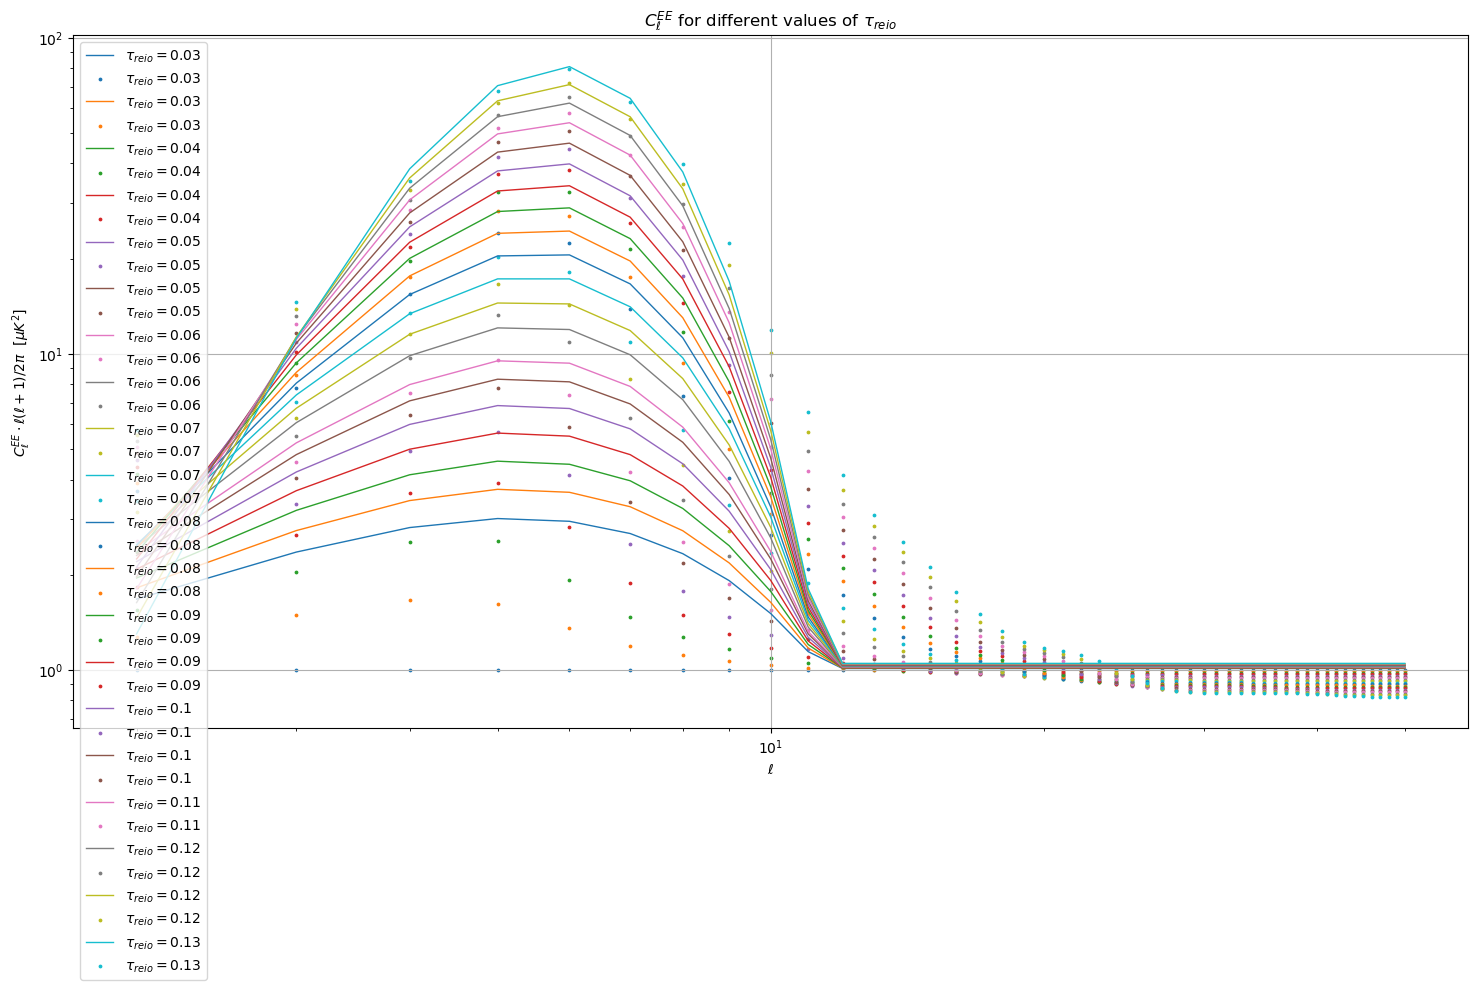

In [9]:
t_reio = np.round(np.linspace(0.0261, 0.1261, 20, endpoint=True),4)
tau_real = 0.0561
index = np.abs(t_reio - tau_real).argmin()
t_reio[index] = tau_real
x = pd.DataFrame({'ell': df['ell'], 'tau': df['tau']})
ee = df['EE'].values
tau = df['tau'].values
a = len(t_reio)
ell = df['ell'].values
b = len(ell)
alpha = int(b/a)
plt.figure(figsize=(18, 9))
ee_alpha = ee[0:alpha]

plt.figure(figsize=(18, 9))
#plt.xlim([20,50])
#plt.ylim([0.7,1.2])
for i in range(a):
    l = ell[i * alpha:(i + 1) * alpha]
    y = (ee[i * alpha:(i + 1) * alpha]) / (ee_alpha)
    z = beta.predict(x)[i * alpha:(i + 1) * alpha]

    string = r'$\tau_{reio}=$' + str(round(t_reio[i], 2))
    plt.loglog(l, z, lw=1, label=string)
    plt.scatter(l, y, s=3, label=string)
    plt.legend()  

    acc = accuracy(y,z)
    print('tau_',i+1,' accuracy:',round(acc,2))

plt.xlabel('$\ell$')
plt.ylabel('$C^{EE}_{\ell}\cdot \ell(\ell+1)/2\pi \ \ [\mu K^2]$')
plt.title(r'$C_{\ell}^{EE}$ for different values of $\tau_{reio}$')
plt.grid(True)
plt.show() 

In [10]:
def h(ell,tau):
    f = 0.105 * np.exp(1.42 * 0.711**ell * ell**2) + 0.439 + 8.28 / ell
    g = (-8.54e3 * tau**2 * (tau + 0.383)) + (1.33e4 * tau * (tau - 0.0430)) + 9.56
    pr = f * g
    return pr

norm_ga = []

for i in range (a):
    z = np.max((ee[(i * alpha):(i + 1)*alpha]/ee[0:alpha]))*h(ell[(i * alpha):(i + 1)*alpha],tau[(i * alpha):(i + 1)*alpha])/np.max(h(ell[(i * alpha):(i + 1)*alpha],tau[(i * alpha):(i + 1)*alpha]))
    norm_ga.append(z)
F_ga = np.concatenate(norm_ga)

tau_ 1  accuracy: 10.16
tau_ 2  accuracy: 11.85
tau_ 3  accuracy: 13.25
tau_ 4  accuracy: 14.63
tau_ 5  accuracy: 16.46
tau_ 6  accuracy: 18.7
tau_ 7  accuracy: 20.8
tau_ 8  accuracy: 24.87
tau_ 9  accuracy: 28.73
tau_ 10  accuracy: 33.06
tau_ 11  accuracy: 37.52
tau_ 12  accuracy: 42.23
tau_ 13  accuracy: 47.16
tau_ 14  accuracy: 52.97
tau_ 15  accuracy: 59.22
tau_ 16  accuracy: 65.59
tau_ 17  accuracy: 72.16
tau_ 18  accuracy: 78.93
tau_ 19  accuracy: 85.31
tau_ 20  accuracy: 91.79


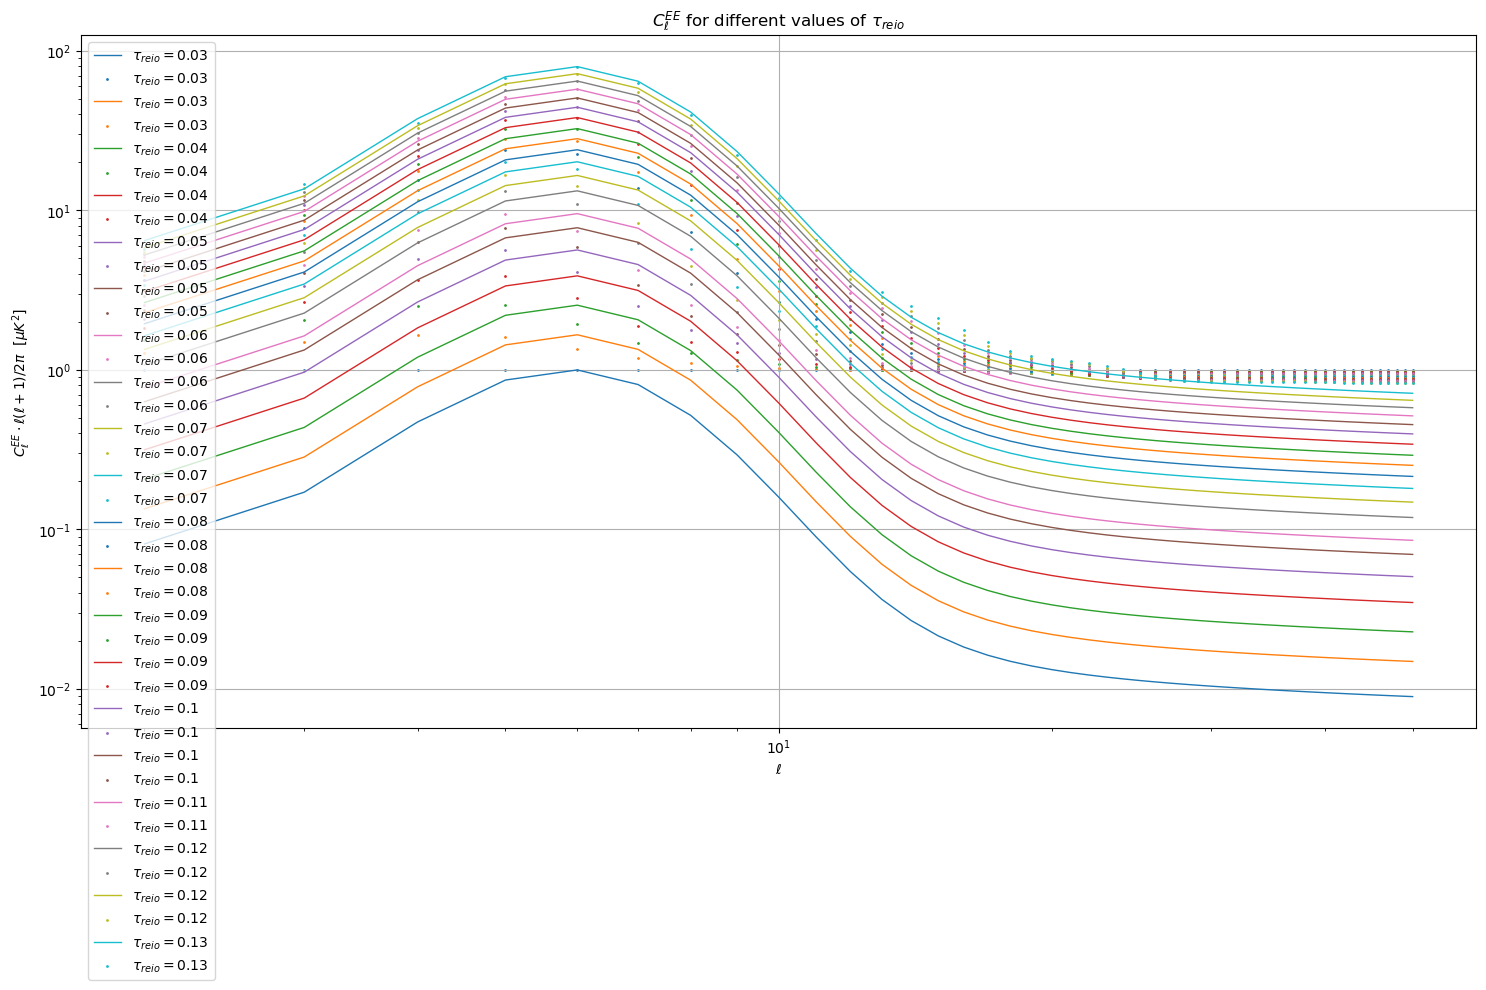

In [11]:
plt.figure(figsize=(18, 9))
#plt.xlim([20,50])
#plt.ylim([0.3,1.2])
for i in range(a):
    l = ell[i * alpha:(i + 1) * alpha]
    y = (ee[i * alpha:(i + 1) * alpha]) / (ee_alpha)
    z = F_ga[i * alpha:(i + 1) * alpha]

    string = r'$\tau_{reio}=$' + str(round(t_reio[i], 2))
    plt.loglog(l, z, lw=1, label=string)
    plt.scatter(l, y, s=1, label=string)
    plt.legend()  

    acc = accuracy(y,z)
    print('tau_',i+1,' accuracy:',round(acc,2))

plt.xlabel('$\ell$')
plt.ylabel('$C^{EE}_{\ell}\cdot \ell(\ell+1)/2\pi \ \ [\mu K^2]$')
plt.title(r'$C_{\ell}^{EE}$ for different values of $\tau_{reio}$')
plt.grid(True)
plt.show() 

## dividere tutto per $e^{-2\tau}$ 

1) hall_of_fame_2023-10-02_160505.349.pkl
$$ F(\ell, \tau) =  \cosh{\left(\tau e^{e^{\tan{\left(\sin{\left(\sinh{\left(\sin{\left(\log{\left(0.547 \ell + 0.547 e^{\cosh{\left(\cos{\left(\log{\left(\tau \right)} \right)} \right)}} \right)} \right)} \right)} \right)} \right)}}} \right)} $$
        average accuracy is: 93.97 % (graficamente più bello)
2) hall_of_fame_2023-10-02_194604.026.pkl
$$ F(\ell, \tau) = e^{\frac{\cosh{\left(9.42 \cdot 0.898^{\ell} \ell \tau \right)}}{\ell}}$$
        average accuracy is: 86.07 %
3) hall_of_fame_2023-10-02_194903.091.pkl
$$ F(\ell, \tau) = \cosh{\left(1.31 \ell \tanh{\left(\frac{0.763^{\ell}}{\tan{\left(\frac{0.0318}{\tau} \right)}} \right)} \right)} $$
        average accuracy is: 94.03 %
4) hall_of_fame_2023-10-02_230558.913.pkl
$$ F(\ell, \tau) = \cosh{\left(\frac{13.9 \ell \tau}{\cosh{\left(\log{\left(0.787^{\ell} \right)} \right)}} \right)} $$
        average accuracy is: 91.41 %
5) hall_of_fame_2023-10-02_231136.733.pkl
$$ F(\ell, \tau) = \cosh{\left(\ell \sinh{\left(\tanh{\left(\frac{0.756^{\ell}}{\tan{\left(\tan{\left(\frac{0.0223}{\tau} \right)} \right)}} \right)} \right)} \right)}$$
        average accuracy is: 94.43 %
6) hall_of_fame_2023-10-03_084102.715.pkl
$$ F(\ell, \tau) = \cosh{\left(\tau e^{1.40 e^{\sin{\left(\log{\left(\ell - \log{\left(\ell \right)} + \frac{0.110}{\tau} \right)} \right)}}} \right)}$$
        average accuracy is:  94.32 %

In [60]:
beta = model.from_file('hall_of_fame_2023-10-03_084102.715.pkl')
print(beta.latex())

Checking if hall_of_fame_2023-10-03_084102.715.pkl exists...
Loading model from hall_of_fame_2023-10-03_084102.715.pkl
\cosh{\left(\tau e^{1.40 e^{\sin{\left(\log{\left(\ell - \log{\left(\ell \right)} + \frac{0.110}{\tau} \right)} \right)}}} \right)}


tau_ 1  accuracy: 93.74
tau_ 2  accuracy: 95.8
tau_ 3  accuracy: 96.01
tau_ 4  accuracy: 95.53
tau_ 5  accuracy: 95.09
tau_ 6  accuracy: 94.89
tau_ 7  accuracy: 94.83
tau_ 8  accuracy: 94.68
tau_ 9  accuracy: 94.65
tau_ 10  accuracy: 94.73
tau_ 11  accuracy: 94.58
tau_ 12  accuracy: 94.51
tau_ 13  accuracy: 94.46
tau_ 14  accuracy: 94.34
tau_ 15  accuracy: 94.23
tau_ 16  accuracy: 94.23
tau_ 17  accuracy: 94.1
tau_ 18  accuracy: 93.32
tau_ 19  accuracy: 92.12
tau_ 20  accuracy: 90.57
average accuracy is: 94.32 %


<Figure size 1800x900 with 0 Axes>

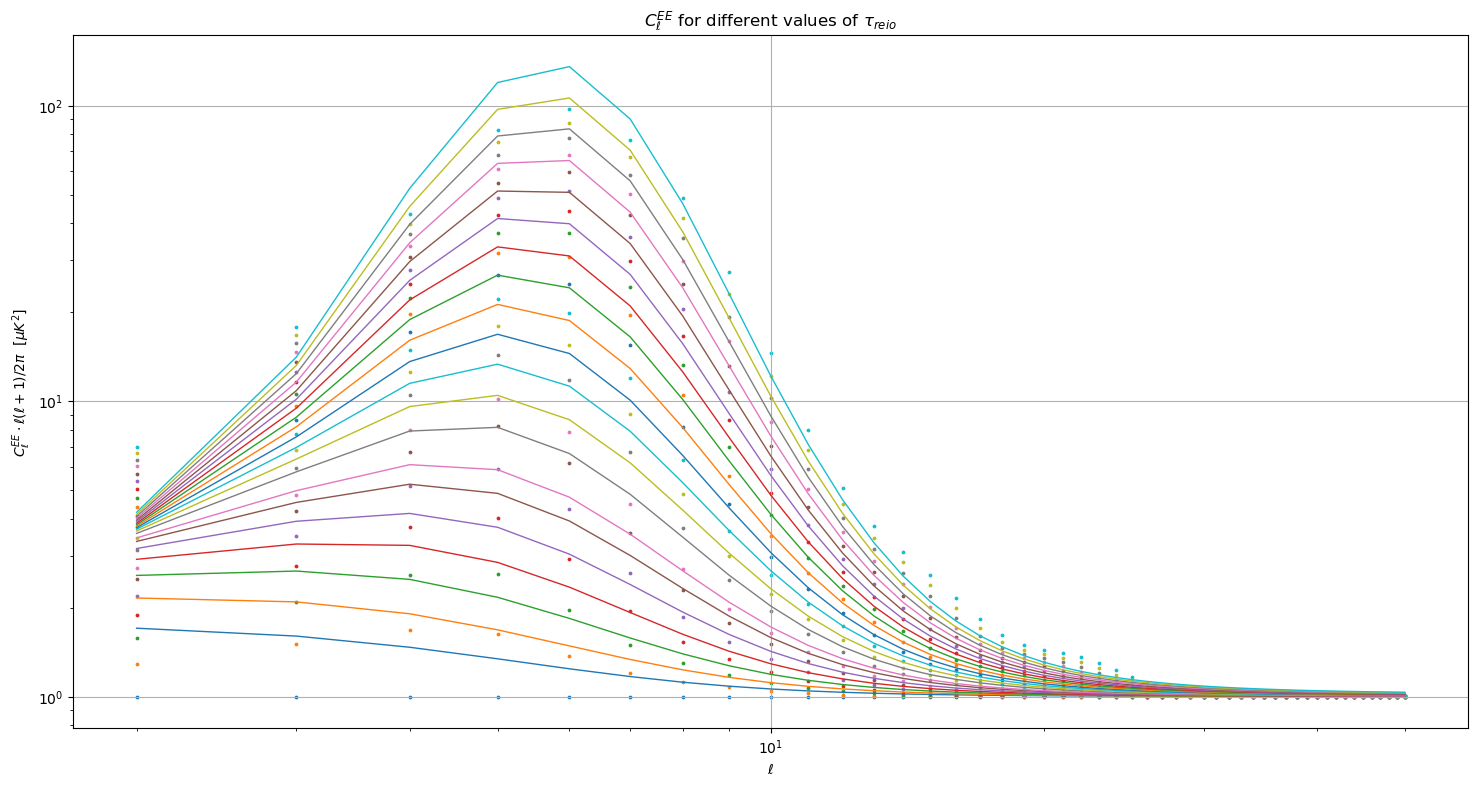

In [66]:
plt.figure(figsize=(18, 9))
ee_alpha = ee[0:alpha]
avg_acc = 0

plt.figure(figsize=(18, 9))
#plt.xlim([20,50])
#plt.ylim([0.8,2])
for i in range(a):
    l = ell[i * alpha:(i + 1) * alpha]
    y = np.exp(-2*tau[0]) * (ee[i * alpha:(i + 1) * alpha]) / (ee_alpha*np.exp(-2*tau[i * alpha:(i + 1) * alpha]))
    z = beta.predict(x)[i * alpha:(i + 1) * alpha]

    string = r'$\tau_{reio}=$' + str(round(t_reio[i], 2))
    plt.loglog(l, z, lw=1, label=string)
    plt.scatter(l, y, s=3, label=string)
    #plt.legend()  

    acc = accuracy(y,z)
    avg_acc += acc/20
    print('tau_',i+1,' accuracy:',round(acc,2))

print('average accuracy is:', round(avg_acc,2), '%')

plt.xlabel('$\ell$')
plt.ylabel('$C^{EE}_{\ell}\cdot \ell(\ell+1)/2\pi \ \ [\mu K^2]$')
plt.title(r'$C_{\ell}^{EE}$ for different values of $\tau_{reio}$')
plt.grid(True)
plt.show() 

In [62]:
def h(ell,tau):
    f = np.exp(1.63 * 0.672 ** ell * ell * (ell - 1.06)) + 3.04 / (ell - 1.07)
    g = tau * (5.97e4 * tau**2 - 76.1) + 1.97
    pr = f * g
    return pr
    
norm_ga = []

for i in range (a):
    z = np.max((ee[(i * alpha):(i + 1)*alpha]/ee[0:alpha]))*h(ell[(i * alpha):(i + 1)*alpha],tau[(i * alpha):(i + 1)*alpha])/np.max(h(ell[(i * alpha):(i + 1)*alpha],tau[(i * alpha):(i + 1)*alpha]))
    norm_ga.append(z)
F_ga = np.concatenate(norm_ga)

tau_ 1  accuracy: 10.5
tau_ 2  accuracy: 12.92
tau_ 3  accuracy: 14.71
tau_ 4  accuracy: 16.79
tau_ 5  accuracy: 19.35
tau_ 6  accuracy: 22.12
tau_ 7  accuracy: 24.53
tau_ 8  accuracy: 29.12
tau_ 9  accuracy: 33.32
tau_ 10  accuracy: 37.52
tau_ 11  accuracy: 41.81
tau_ 12  accuracy: 46.42
tau_ 13  accuracy: 51.1
tau_ 14  accuracy: 56.62
tau_ 15  accuracy: 62.39
tau_ 16  accuracy: 68.14
tau_ 17  accuracy: 73.99
tau_ 18  accuracy: 79.78
tau_ 19  accuracy: 85.24
tau_ 20  accuracy: 90.63


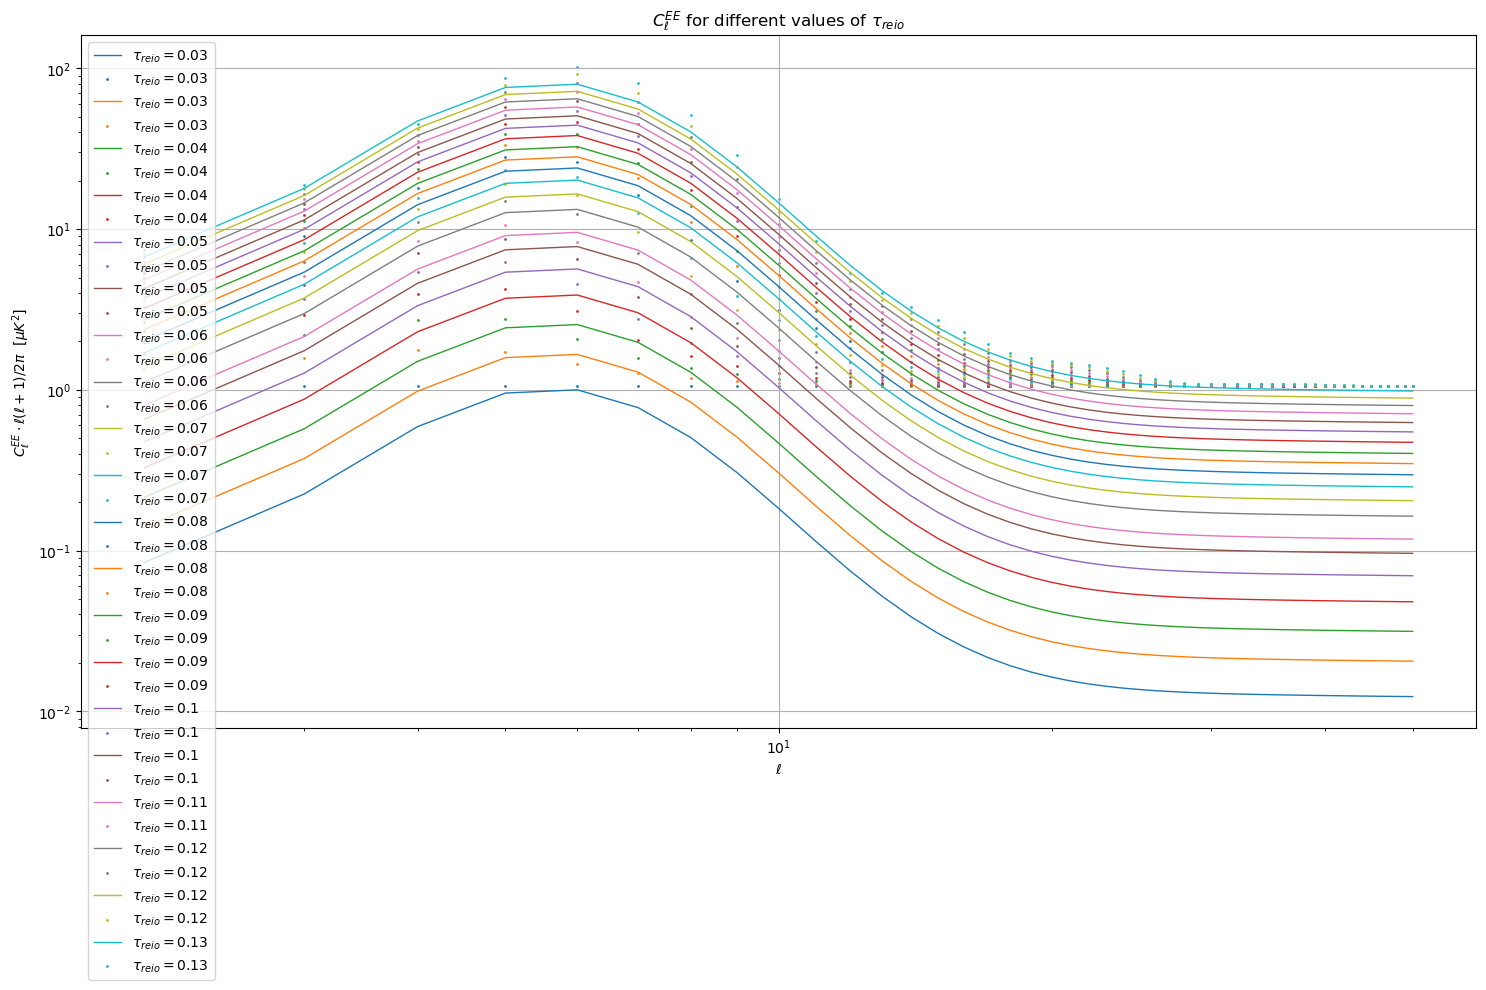

In [63]:
plt.figure(figsize=(18, 9))
#plt.xlim([20,50])
#plt.ylim([0.3,1.2])
for i in range(a):
    l = ell[i * alpha:(i + 1) * alpha]
    y = (ee[i * alpha:(i + 1) * alpha]) / (ee_alpha*np.exp(-2*tau[i * alpha:(i + 1) * alpha]))
    z = F_ga[i * alpha:(i + 1) * alpha]

    string = r'$\tau_{reio}=$' + str(round(t_reio[i], 2))
    plt.loglog(l, z, lw=1, label=string)
    plt.scatter(l, y, s=1, label=string)
    plt.legend()  

    acc = accuracy(y,z)
    print('tau_',i+1,' accuracy:',round(acc,2))

plt.xlabel('$\ell$')
plt.ylabel('$C^{EE}_{\ell}\cdot \ell(\ell+1)/2\pi \ \ [\mu K^2]$')
plt.title(r'$C_{\ell}^{EE}$ for different values of $\tau_{reio}$')
plt.grid(True)
plt.show() 